# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

https://thegyre.io/coursework/stats/body_temp/

****

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats as smd
import pylab
from scipy.stats import norm

# matplotlib setup
%matplotlib inline


#to keep same random sample for testing 
np.random.seed(42)

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


---


In [2]:
# Your work here.
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

def bootstrap(df, size):
    np.random.seed(42)
    size = 10000
    bs_replicates_m = np.empty(size)

    for i in range(size):
        bs_sample_m = np.random.choice(df, len(df))
        bs_replicates_m[i] = np.mean(bs_sample_m)
    return bs_replicates_m

    

---


## Q1- Is the distribution of body temperatures normal? 


<div class="alert alert-info" role="alert">
<p><b>Answer</b>
<ol>
This graph below shows that the frequency distribution of the data is very close to normal.
 </ol></p>
</div

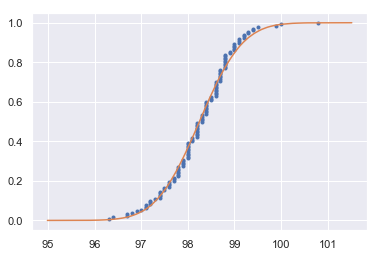

In [3]:
sns.set()
# Plot the CDFs
x, y = ecdf(df.temperature)

# draw 100,000 random samples from a normal distribution
theoric = np.random.normal(np.mean(df.temperature), np.std(df.temperature), 100000)
x_theoric, y_theoric = ecdf(theoric)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theoric, y_theoric)

plt.show();

---


## Q2- Is the sample size large? Are the observations independent?

Q2: Sample Size
Is the sample size large? Are the observations independent?

Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

<b>Answer</b>

<ol><b>Is the sample sufficiently large?</b> <br>
There is a commonly-accepted rule of thumb is that a sample size of 30 constitutes 'sufficiently large'.Since sample size is 130 that is more than 30. So It is 'sufficiently large'.
In order to have sound results, We should apply 10% condition. The 10% condition states that sample sizes should be no more than 10% of the population. 10% of the data makes way more that 130 sample sizes which is  sufficiently enough. 

For the cases the population from which the samples are drawn is unimodal and symmetric about the mean, a sample size of less than 30 may be sufficient. if the population was multi-modal or skewed, a sample size of more than 30 would be required.</ol>

<ol><b>Is the observation independent?</b><br> 
Since body temp of a person is indendent from each other. Yes we can consider that the observations are independent. (Note: we are igroning special cases such has samples from same house hold, or sample from sick people etc.)</ol>


---


## Q3 -Is the true population mean really 98.6 degrees F?

  <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

---


Null hypothesis(Ho) = 98.6 <br>
Aternative hypothesis(Ha) != 98.6

<b>3.0 The mean sample data
    of the given data is 98.24923076923078</b>

In [4]:
np.mean(df.temperature)

98.24923076923078

---


<b>3.1 I will take 10000 samples than apply bootstrapping to test the hypothesis</b>

In [5]:
# I will create an empty array that can hold 100000 variables. 
bootstrapping_replicates= bootstrap(df.temperature, 100000)   

p = np.sum(bootstrapping_replicates >= 98.6) / 100000

print('p-value: {}'.format(p))
print('mean: {:0.5}'.format(np.mean(bootstrapping_replicates)))
print('Standard deviation: {}'.format(np.std(bootstrapping_replicates)))



p-value: 0.0
mean: 98.25
Standard deviation: 0.06447493430439619


<b>Answer</b>

<ol>Null hypothesis refers to true population mean 98.6 degrees F. I check the percentage of possibilities of the p values that might be bigger then test value for 100000 bootstrapping replicas. The result was that there were no sample mean that was greater than 98.6. So that P value was zero. Since P value smaller that 0.05. <b>Null hypothesis should be rejected.</b> </ol>

---


<b>3.2 Frequentist statistical testing</b>

In [6]:
t_stat = stats.ttest_1samp(df.temperature, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))



t-score: -5.45482
p-value: 0.0


<b>Answer</b>

<ol>In cases we dont know the the standard deviation of the population. We need to use the standard deviation of the sample popularion. By the formula Z-stat that requires the standard deviation of the population,we cannot use it,however t-stat uses the sample standard deviation. Therefore we need to use t-stat.</ol>

---


## Q4 -Draw a small sample of size 10 from the data and repeat both frequentist tests.

  <ul>
    <li> Which one is the correct one to use?
    <li>What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?
    </ul>

In [7]:
sample_temp = np.random.choice(df.temperature, size=10)
r =stats.ttest_1samp(sample_temp, 98.6)

print("t =",r.statistic)
print('pvalue = ',r.pvalue)

t = 2.2948907108029672
pvalue =  0.047393936397399125


<b>Answer</b>

<ol>I could not perform the z_test since the mean of the standard deviation of the population is not provided. In cases we dont know the the standard deviation of the population,we need to use the standard deviation of the sample popularion. By the formula Z-stat required the standard deviation of the population but t-stat wont. Therefore we need to use t-stat.
According to stat p value is smaller than 0.05. Thus, null hypothesis should be rejected in this case</ol>

---


## Q5 -At what temperature should we consider someone's temperature to be "abnormal"?

  <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
<li>Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

In [8]:
bootstrap_replica= bootstrap(df.temperature, 100000)
p = np.sum(bootstrap_replica >= 98.6) / len(bootstrap_replica)

print('p-value: {}'.format(p))
mean = np.mean(bootstrap_replica)
sdt = np.std(bootstrap_replica)
print('Mean of the bootstrap_replica is {} and \nStandard deviation of the bootstrap_replica is {}'.format(round(mean,2),round(sdt,2)))
confidence_interval = stats.norm.interval(0.95, loc=mean, scale=sdt)
print('Confidance interval is {}'.format(confidence_interval))



p-value: 0.0
Mean of the bootstrap_replica is 98.25 and 
Standard deviation of the bootstrap_replica is 0.06
Confidance interval is (98.12345891239626, 98.37619601068066)


For the null hypothesis with the standard deviation of 0.06436006633092962. The confidance interval is (98.48240216092759, 98.7175978390724).

In [9]:
stats.norm.interval(0.95, loc=98.6, scale=0.06)

(98.48240216092759, 98.7175978390724)

---


## Q6 -Is there a significant difference between males and females in normal temperature?

What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

<b>Sample sizes for both male and females are more than 35 and less than 10% of the population. Sample sizes are suffiently large.</b>
#### Null Hypothesis
<ol> Ho: mean_of_males_body_temp = mean_of_females_body_temp <br>
    Ha: mean_of_males_body_temp != mean_of_females_body_temp</ol>

In [10]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

There are 130 people tested who are of 65 males and 65 males. According to analysis with bootstrapping with 100000 samples, calculated mean of the human body temperature  is 98.25°, and null hypothesis that suggested mean of the human body temperature  is 98.6°, should be rejected.  <br><br>
Based on the stats above, it is observed that mean body temprature of the Female is higher than male (about 0.3 degrees F).

In [11]:
males.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [12]:
females.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

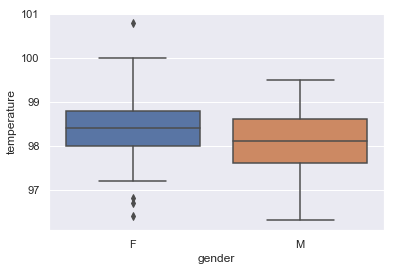

In [13]:
sns.boxplot(x = 'gender', y = 'temperature', data=df)

---


<b>Time to plot them to check normality</b>

ECDF for x and y values of both male and females

In [14]:
male_x, male_y = ecdf(males.temperature)
female_x, female_y = ecdf(females.temperature)

ECDF for theorical x and y values of both male and females

In [15]:
males_th_x,males_th_y=ecdf(np.random.normal(np.mean(males.temperature), np.std(males.temperature), 100000))
females_th_x,females_th_y=ecdf(np.random.normal(np.mean(females.temperature), np.std(females.temperature), 100000))

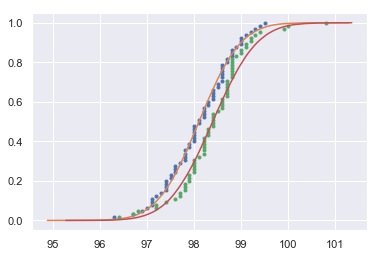

In [16]:
_ = plt.plot(male_x, male_y, marker='.', linestyle='none')
_ = plt.plot(males_th_x, males_th_y)

_ = plt.plot(female_x, female_y, marker='.', linestyle='none')
_ = plt.plot(females_th_x, females_th_y)

plt.show();

---


<b>Both males and females body temprature are close to normal distrubution with some variation. Females have little more variance comparated to males. </b>

In [17]:
male_var = np.var(males.temperature)
female_var =np.var(females.temperature)
print('Variance of males body temp: \n{}\nVariance of females body temp: \n{}'.format(male_var,female_var))

Variance of males body temp: 
0.4807479289940825
Variance of females body temp: 
0.5442698224852062


In [18]:
statistics = stats.ttest_ind(males.temperature, females.temperature, equal_var=False)
print('t-statistic: {:0.3}\np-value: {:0.2}'.format(statistics.statistic, statistics.pvalue))

t-statistic: -2.29
p-value: 0.024


---


###  Confidence Interval For Males and Females to check Abnormality

In [19]:
Females_confidace_intervals = stats.norm.interval(0.95, loc=np.mean(females.temperature), scale=np.std(females.temperature))
Males_confidace_intervals = stats.norm.interval(0.95, loc=np.mean(males.temperature), scale=np.std(males.temperature))
print('Males sample mean(one draw): {}\nMales sample standard deviation(one draw):{}'.format(np.mean(males.temperature),np.std(males.temperature)))
print('For Males 95% confidence interval (one draw): {}'.format(Males_confidace_intervals))

print('\n\nFemales sample mean(one draw): {}\nFemales sample standard deviation(one draw):{}'.format(np.mean(females.temperature),np.std(females.temperature)))
print('For Females 95% confidence interval (one draw): {}'.format(Females_confidace_intervals))

Males sample mean(one draw): 98.1046153846154
Males sample standard deviation(one draw):0.6933598841828696
For Males 95% confidence interval (one draw): (96.74565498329211, 99.46357578593869)


Females sample mean(one draw): 98.39384615384613
Females sample standard deviation(one draw):0.7377464486428966
For Females 95% confidence interval (one draw): (96.94788968478372, 99.83980262290854)


In [20]:
males_bootstrappping= bootstrap(males.temperature, 10000)
Males_confidace_intervals = stats.norm.interval(0.95, loc=np.mean(males_bootstrappping), scale=np.std(males_bootstrappping))
print('Males sample mean (10000 draw): {}\nMales sample standard deviation(10000 draw):{}'.format(np.mean(males_bootstrappping),np.std(males_bootstrappping)))
print('For Males 95% confidence interval (10000 draw): {}'.format(Males_confidace_intervals))

females_bootstrappping= bootstrap(females.temperature, 10000)
Feales_confidace_intervals = stats.norm.interval(0.95, loc=np.mean(females_bootstrappping), scale=np.std(females_bootstrappping))
print('\n\nFeales sample mean (10000 draw): {}\nFeales sample standard deviation(10000 draw):{}'.format(np.mean(females_bootstrappping),np.std(females_bootstrappping)))
print('For Males 95% confidence interval (10000 draw): {}'.format(Females_confidace_intervals))


Males sample mean (10000 draw): 98.10559261538461
Males sample standard deviation(10000 draw):0.08633214957134736
For Males 95% confidence interval (10000 draw): (97.93638471151684, 98.27480051925238)


Feales sample mean (10000 draw): 98.39412738461539
Feales sample standard deviation(10000 draw):0.09173738933260607
For Males 95% confidence interval (10000 draw): (96.94788968478372, 99.83980262290854)


---


Because the null hypothesis is that the means are equal, a two-tailed test is required.

<b> P_value is smaller than 0.05. Thus, null hypothesis should be rejected and  mean male and female body temperatures are different.</b>

In [21]:
f=bootstrap(females.temperature, 10000)
m= bootstrap(males.temperature, 10000)
result = stats.ttest_ind(f,m,equal_var=False)
print('Acording to Welch\'s t-test:\nt-statistic: {:0.5}\np-value: {:0.5}'.format(result[0], result[1]))


Acording to Welch's t-test:
t-statistic: 229.03
p-value: 0.0
